In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

dump(xgb, "/home/jovyan/X-IIoTID/pre_train/XGB.joblib")
model = xgb


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [7.71982390e-04 7.34068452e-02 1.36612999e-03 7.60618814e-03
 1.81365655e-02 0.00000000e+00 3.38325611e-03 6.45350985e-03
 6.19538616e-03 6.42616684e-03 8.21352282e-03 6.81188656e-01
 1.68265186e-04 1.33545673e-02 2.20302150e-03 1.48776528e-03
 2.85430894e-05 1.01427847e-03 1.45684462e-05]
TPR: [2.97935731e-03 1.12280702e-01 0.00000000e+00 1.29641837e-02
 0.00000000e+00 0.00000000e+00 2.95566502e-03 2.76716300e-02
 6.34462870e-02 1.36363636e-01 3.02267003e-02 8.49394995e-01
 5.88448823e-01 1.33004926e-01 6.84801518e-02 9.45626478e-02
 1.09890110e-02 0.00000000e+00 6.78656261e-04]
FNR: [0.99702064 0.8877193  1.         0.98703582 1.         1.
 0.99704433 0.97232837 0.93655371 0.86363636 0.9697733  0.150605
 0.41155118 0.86699507 0.93151985 0.90543735 0.98901099 1.
 0.99932134]
TNR: [0.99922802 0.92659315 0.99863387 0.99239381 0.98186343 1.
 0.99661674 0.99354649 0.99380461 0.99357383 0.99178648 0.31881134
 0.99983173 0.98664543 0.99779698 0.99851223 0.99997146 0.998

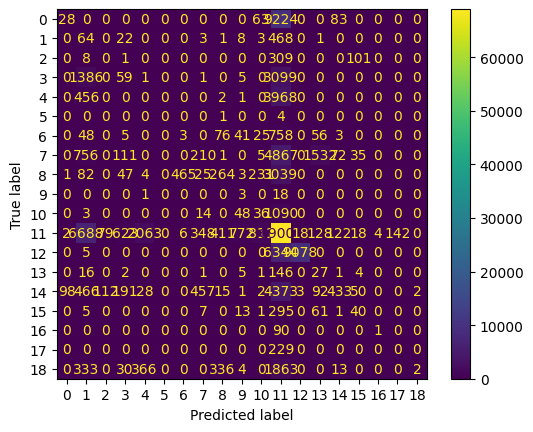

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [6.42044760e-04 6.92825433e-02 1.41619758e-03 2.02138872e-01
 6.62724682e-04 0.00000000e+00 2.98100061e-03 3.92035645e-04
 1.58449022e-02 7.16364259e-02 4.93386748e-03 7.51758743e-01
 1.68265186e-03 2.79946010e-03 3.16637666e-03 4.17504131e-02
 2.14073170e-05 3.02140699e-03 2.54947809e-04]
TPR: [0.01074697 0.02105263 0.         0.00153812 0.         0.
 0.00985222 0.         0.00793079 0.04545455 0.         0.37970679
 0.41634796 0.         0.03052349 0.11820331 0.01098901 0.23580786
 0.        ]
FNR: [0.98925303 0.97894737 1.         0.99846188 1.         1.
 0.99014778 1.         0.99206921 0.95454545 1.         0.62029321
 0.58365204 1.         0.96947651 0.88179669 0.98901099 0.76419214
 1.        ]
TNR: [0.99935796 0.93071746 0.9985838  0.79786113 0.99933728 1.
 0.997019   0.99960796 0.9841551  0.92836357 0.99506613 0.24824126
 0.99831735 0.99720054 0.99683362 0.95824959 0.99997859 0.99697859
 0.99974505]
Accuracy: 0.2690722384653783
Precision(micro,macro,weight

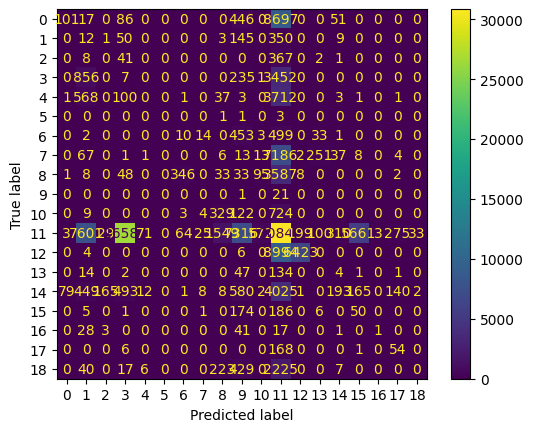

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [2.91977498e-03 6.23514249e-02 9.44131721e-04 2.18685279e-01
 6.11179429e-04 0.00000000e+00 9.05074884e-04 9.04697643e-05
 1.72192050e-02 6.95038799e-02 1.39673041e-02 8.35991931e-01
 1.16263231e-02 3.69571583e-02 3.92063148e-03 7.21709213e-03
 3.56788617e-05 4.02139985e-03 4.00632271e-04]
TPR: [0.         0.02280702 0.         0.00153812 0.         0.
 0.         0.         0.00216294 0.         0.         0.3526262
 0.00661178 0.         0.00632611 0.         0.         0.73799127
 0.        ]
FNR: [1.         0.97719298 1.         0.99846188 1.         1.
 1.         1.         0.99783706 1.         1.         0.6473738
 0.99338822 1.         0.99367389 1.         1.         0.26200873
 1.        ]
TNR: [0.99708023 0.93764858 0.99905587 0.78131472 0.99938882 1.
 0.99909493 0.99990953 0.9827808  0.93049612 0.9860327  0.16400807
 0.98837368 0.96304284 0.99607937 0.99278291 0.99996432 0.9959786
 0.99959937]
Accuracy: 0.20671040433573415
Precision(micro,macro,weighted

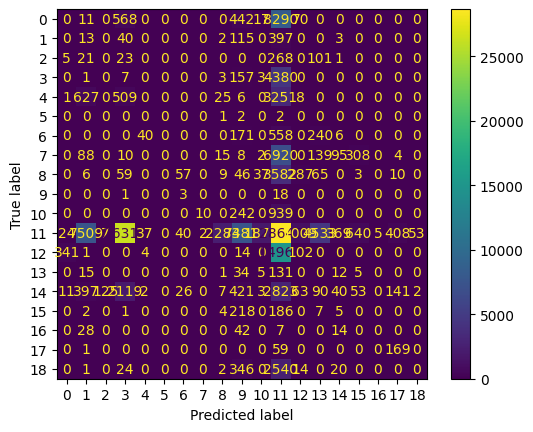

epsilon = 0.3
FPR: [5.42680690e-04 4.43219247e-02 1.13009706e-03 2.19562349e-01
 7.80542403e-04 1.42627919e-05 7.03947132e-04 2.48791852e-04
 4.06484945e-02 6.99532124e-02 1.55352095e-03 8.23735824e-01
 3.66497600e-02 6.07811351e-02 3.51736653e-03 3.50483166e-04
 1.42715447e-05 3.59283148e-03 8.88675218e-04]
TPR: [0.00000000e+00 2.80701754e-02 0.00000000e+00 1.53812349e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.27078666e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.08927978e-01
 4.34303494e-03 0.00000000e+00 6.16795825e-03 0.00000000e+00
 1.09890110e-02 7.46724891e-01 0.00000000e+00]
FNR: [1.         0.97192982 1.         0.99846188 1.         1.
 1.         0.99947292 1.         1.         1.         0.69107202
 0.99565697 1.         0.99383204 1.         0.98901099 0.25327511
 1.        ]
TNR: [0.99945732 0.95567808 0.9988699  0.78043765 0.99921946 0.99998574
 0.99929605 0.99975121 0.95935151 0.93004679 0.99844648 0.17626418
 0.96335024 0.93921886 0.99648263 0.99964952

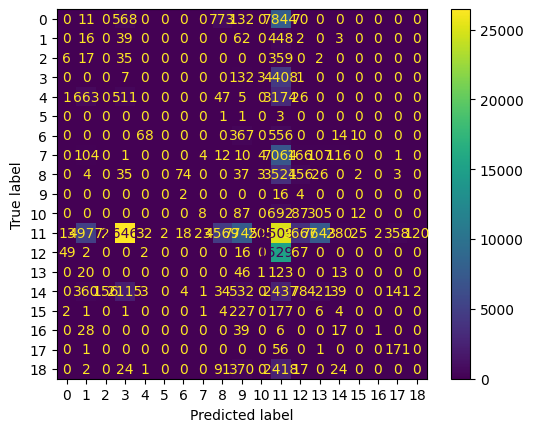

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [5.35037300e-05 1.48868681e-01 3.48327385e-03 3.68811681e-02
 3.65750388e-02 0.00000000e+00 3.96508997e-03 1.95263908e-03
 3.01317714e-03 6.04815702e-03 4.19306813e-03 6.25536099e-01
 2.40378837e-04 3.09154663e-02 1.30986431e-02 7.22424485e-04
 2.85430894e-05 1.07142092e-04 0.00000000e+00]
TPR: [0.         0.18245614 0.         0.02087453 0.00948724 0.
 0.00295567 0.03030702 0.04253785 0.18181818 0.00923594 0.65622423
 0.58520775 0.24630542 0.01170331 0.10638298 0.05494505 0.03930131
 0.        ]
FNR: [1.         0.81754386 1.         0.97912547 0.99051276 1.
 0.99704433 0.96969298 0.95746215 0.81818182 0.99076406 0.34377577
 0.41479225 0.75369458 0.98829669 0.89361702 0.94505495 0.96069869
 1.        ]
TNR: [0.9999465  0.85113132 0.99651673 0.96311883 0.96342496 1.
 0.99603491 0.99804736 0.99698682 0.99395184 0.99580693 0.3744639
 0.99975962 0.96908453 0.98690136 0.99927758 0.99997146 0.99989286
 1.        ]
Accuracy: 0.45060258147329385
Precision(micro,macro,weigh

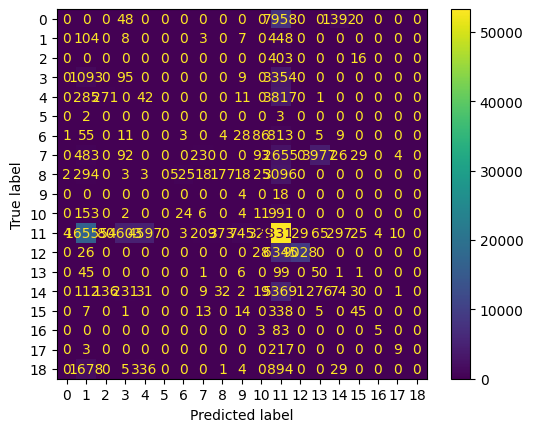

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [1.37581020e-04 4.89975655e-02 1.00135182e-04 5.75254829e-02
 1.31366759e-02 0.00000000e+00 4.04410444e-03 1.10825461e-03
 5.90141766e-03 3.36214767e-02 2.62516272e-03 7.53708193e-01
 9.37477464e-04 6.70584959e-03 2.71830449e-03 9.39867103e-03
 2.14073170e-05 4.68568082e-03 1.96674024e-04]
TPR: [0.00627793 0.06491228 0.         0.00681169 0.         0.
 0.00098522 0.         0.05022831 0.         0.         0.76985192
 0.38341868 0.25615764 0.02783489 0.25059102 0.13186813 0.01310044
 0.05055989]
FNR: [0.99372207 0.93508772 1.         0.99318831 1.         1.
 0.99901478 1.         0.94977169 1.         1.         0.23014808
 0.61658132 0.74384236 0.97216511 0.74940898 0.86813187 0.98689956
 0.94944011]
TNR: [0.99986242 0.95100243 0.99989986 0.94247452 0.98686332 1.
 0.9959559  0.99889175 0.99409858 0.96637852 0.99737484 0.24629181
 0.99906252 0.99329415 0.9972817  0.99060133 0.99997859 0.99531432
 0.99980333]
Accuracy: 0.49413107038436854
Precision(micro,macro,weigh

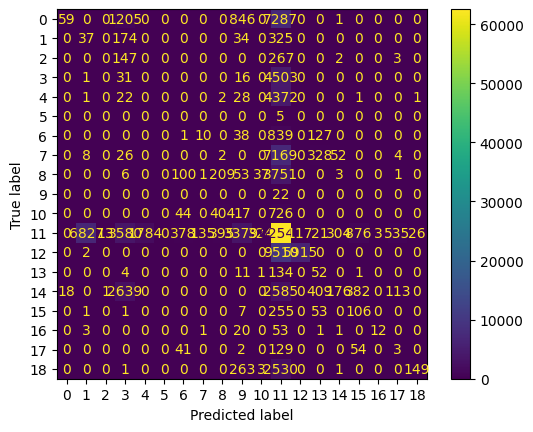

epsilon = 0.2
FPR: [4.58603400e-05 2.23972505e-02 1.14440209e-04 8.10221184e-02
 1.22235886e-02 1.42627919e-05 1.22831591e-03 7.53914702e-04
 3.68930469e-03 3.82717106e-02 5.66747459e-03 7.62726518e-01
 1.46470838e-02 1.20333936e-02 5.33205882e-03 2.38900770e-03
 6.42219511e-05 1.15927743e-02 1.45684462e-04]
TPR: [0.00000000e+00 2.10526316e-02 0.00000000e+00 2.63678312e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22566691e-02 0.00000000e+00 0.00000000e+00 8.13414739e-01
 9.72321255e-04 1.97044335e-02 1.58152776e-04 2.34042553e-01
 5.49450549e-02 2.62008734e-02 1.69664065e-03]
FNR: [1.         0.97894737 1.         0.99736322 1.         1.
 1.         1.         0.98774333 1.         1.         0.18658526
 0.99902768 0.98029557 0.99984185 0.76595745 0.94505495 0.97379913
 0.99830336]
TNR: [0.99995414 0.97760275 0.99988556 0.91897788 0.98777641 0.99998574
 0.99877168 0.99924609 0.9963107  0.96172829 0.99433253 0.23727348
 0.98535292 0.98796661 0.99466794 0.99761099

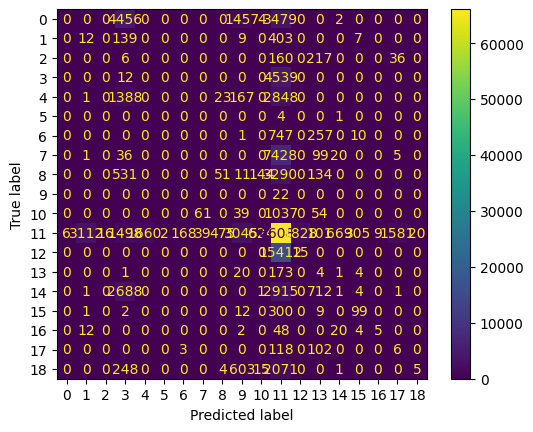

epsilon = 0.3
FPR: [1.37581020e-04 2.18101103e-02 1.00135182e-04 8.71247577e-02
 9.19714587e-03 4.27883758e-05 1.19240024e-03 3.61879057e-04
 5.20912184e-02 2.20743467e-02 8.73136314e-03 6.90868099e-01
 2.33808482e-02 2.02960858e-02 4.71222565e-03 3.43330448e-03
 5.70861787e-05 7.61423133e-03 2.18526693e-04]
TPR: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75785542e-03
 0.00000000e+00 2.00000000e-01 0.00000000e+00 0.00000000e+00
 9.61307378e-03 0.00000000e+00 0.00000000e+00 7.83182954e-01
 0.00000000e+00 5.91133005e-02 4.74458327e-04 9.21985816e-02
 4.39560440e-02 1.31004367e-02 0.00000000e+00]
FNR: [1.         1.         1.         0.99824214 1.         0.8
 1.         1.         0.99038693 1.         1.         0.21681705
 1.         0.9408867  0.99952554 0.90780142 0.95604396 0.98689956
 1.        ]
TNR: [0.99986242 0.97818989 0.99989986 0.91287524 0.99080285 0.99995721
 0.9988076  0.99963812 0.94790878 0.97792565 0.99126864 0.3091319
 0.97661915 0.97970391 0.99528777 0.9965667 

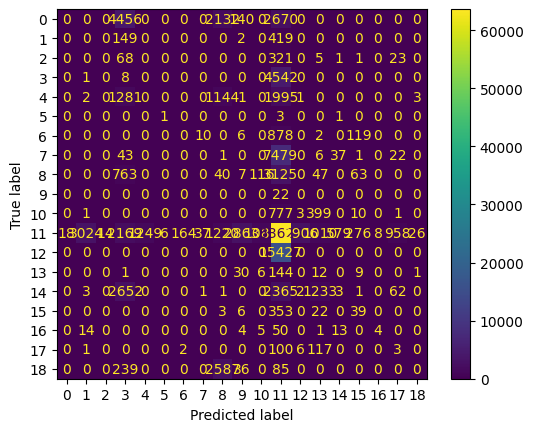

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [5.35037300e-05 1.51918946e-01 3.43320626e-03 3.53112862e-02
 3.70463097e-02 0.00000000e+00 3.99382250e-03 2.08834372e-03
 3.07197084e-03 6.01249572e-03 4.51671833e-03 6.24705464e-01
 2.48391465e-04 3.06155241e-02 1.31359824e-02 8.01104380e-04
 3.56788617e-05 1.21427704e-04 0.00000000e+00]
TPR: [0.         0.17894737 0.         0.0206548  0.01084256 0.
 0.00295567 0.02991171 0.04253785 0.18181818 0.00923594 0.65292532
 0.58520775 0.25123153 0.01170331 0.10401891 0.05494505 0.0349345
 0.        ]
FNR: [1.         0.82105263 1.         0.9793452  0.98915744 1.
 0.99704433 0.97008829 0.95746215 0.81818182 0.99076406 0.34707468
 0.41479225 0.74876847 0.98829669 0.89598109 0.94505495 0.9650655
 1.        ]
TNR: [0.9999465  0.84808105 0.99656679 0.96468871 0.96295369 1.
 0.99600618 0.99791166 0.99692803 0.9939875  0.99548328 0.37529454
 0.99975161 0.96938448 0.98686402 0.9991989  0.99996432 0.99987857
 1.        ]
Accuracy: 0.4486843043571276
Precision(micro,macro,weighte

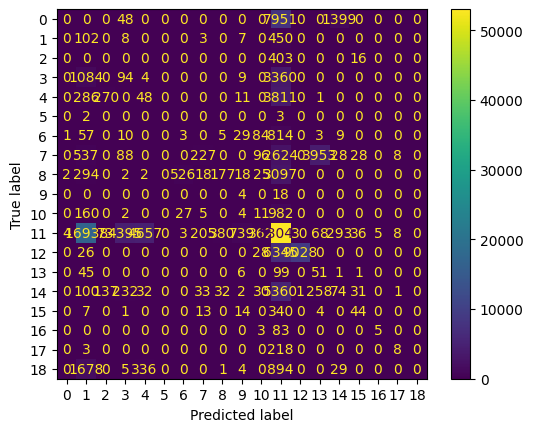

epsilon = 0.1
FPR: [1.52867800e-04 3.35099527e-02 2.00270365e-04 6.45788958e-02
 1.21499525e-02 7.13139597e-06 3.32579104e-03 8.59462760e-04
 6.29827514e-03 3.14390049e-02 1.28740857e-03 7.60404129e-01
 7.21136511e-04 6.43447335e-03 2.76311171e-03 1.15802499e-02
 2.14073170e-05 4.19997000e-03 2.62232032e-04]
TPR: [0.01106618 0.05964912 0.         0.00922874 0.         0.
 0.         0.         0.04734439 0.04545455 0.         0.78623567
 0.38387243 0.26108374 0.02783489 0.24349882 0.13186813 0.01310044
 0.02850356]
FNR: [0.98893382 0.94035088 1.         0.99077126 1.         1.
 1.         1.         0.95265561 0.95454545 1.         0.21376433
 0.61612757 0.73891626 0.97216511 0.75650118 0.86813187 0.98689956
 0.97149644]
TNR: [0.99984713 0.96649005 0.99979973 0.9354211  0.98785005 0.99999287
 0.99667421 0.99914054 0.99370172 0.968561   0.99871259 0.23959587
 0.99927886 0.99356553 0.99723689 0.98841975 0.99997859 0.99580003
 0.99973777]
Accuracy: 0.5034871282892391
Precision(micro,macr

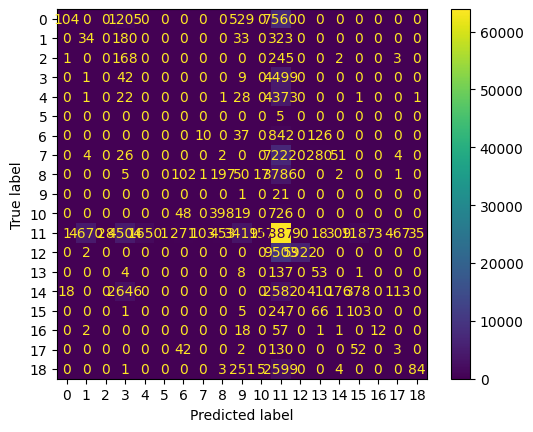

epsilon = 0.2
FPR: [2.29301700e-05 1.44708578e-02 2.86100521e-05 9.02497807e-02
 1.23340427e-02 2.85255839e-05 1.32887979e-03 6.70984085e-04
 3.91713028e-03 3.36714025e-02 4.44479606e-03 7.57946127e-01
 1.95267742e-02 1.23976090e-02 4.43591448e-03 1.98130280e-03
 3.56788617e-05 8.60708138e-03 2.18526693e-05]
TPR: [0.00000000e+00 2.10526316e-02 0.00000000e+00 2.63678312e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22566691e-02 0.00000000e+00 0.00000000e+00 8.24419306e-01
 7.13035587e-04 4.43349754e-02 1.58152776e-04 1.89125296e-01
 3.29670330e-02 1.74672489e-02 1.69664065e-03]
FNR: [1.         0.97894737 1.         0.99736322 1.         1.
 1.         1.         0.98774333 1.         1.         0.17558069
 0.99928696 0.95566502 0.99984185 0.8108747  0.96703297 0.98253275
 0.99830336]
TNR: [0.99997707 0.98552914 0.99997139 0.90975022 0.98766596 0.99997147
 0.99867112 0.99932902 0.99608287 0.9663286  0.9955552  0.24205387
 0.98047323 0.98760239 0.99556409 0.9980187 

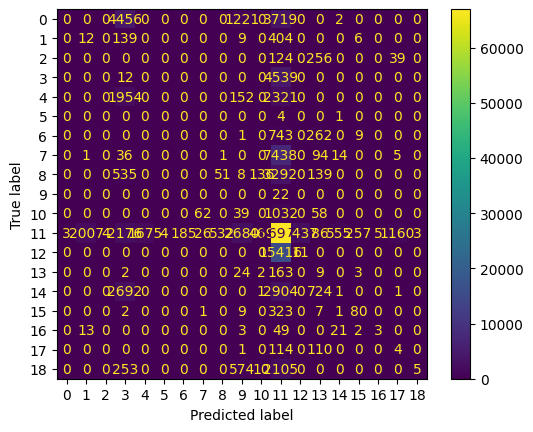

epsilon = 0.3
FPR: [1.22294240e-04 1.55520550e-02 3.57625652e-05 9.13332203e-02
 6.66406486e-03 1.14102336e-04 1.68085336e-03 1.28165499e-04
 4.74391669e-02 1.53486249e-02 5.97674034e-03 6.93309149e-01
 2.87012331e-02 1.81250759e-02 4.54793252e-03 2.92546153e-03
 4.28146340e-05 1.08999221e-02 8.01264541e-05]
TPR: [0.         0.         0.         0.00175786 0.         0.2
 0.         0.         0.00961307 0.         0.         0.80428119
 0.         0.06403941 0.         0.11111111 0.04395604 0.01310044
 0.        ]
FNR: [1.         1.         1.         0.99824214 1.         0.8
 1.         1.         0.99038693 1.         1.         0.19571881
 1.         0.93596059 1.         0.88888889 0.95604396 0.98689956
 1.        ]
TNR: [0.99987771 0.98444795 0.99996424 0.90866678 0.99333594 0.9998859
 0.99831915 0.99987183 0.95256083 0.98465138 0.99402326 0.30669085
 0.97129877 0.98187492 0.99545207 0.99707454 0.99995719 0.98910008
 0.99991987]
Accuracy: 0.4667688796976396
Precision(micro,mac

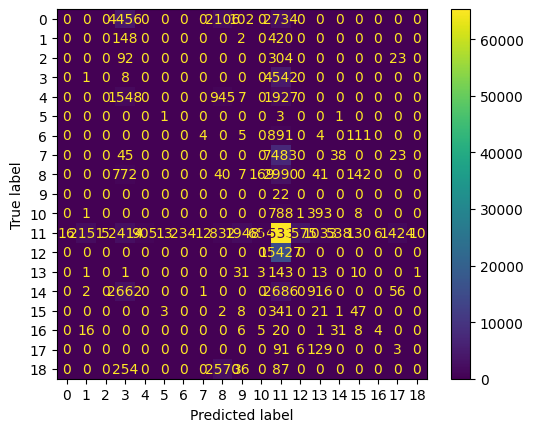

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [7.64339000e-06 6.56522984e-02 5.93658582e-04 1.04216570e-02
 1.98301952e-02 0.00000000e+00 4.13030205e-03 4.03344366e-03
 5.21059169e-03 1.67465480e-02 6.14216155e-03 5.98345510e-01
 1.34612149e-03 1.41829790e-02 8.61792139e-03 3.60496971e-03
 1.28443902e-04 3.34997607e-03 0.00000000e+00]
TPR: [0.01021494 0.3245614  0.00238663 0.06548011 0.00225887 0.
 0.05418719 0.06351298 0.0913242  0.54545455 0.01175483 0.80780167
 0.88319181 0.13300493 0.22093943 0.08510638 0.02197802 0.0349345
 0.        ]
FNR: [0.98978506 0.6754386  0.99761337 0.93451989 0.99774113 1.
 0.94581281 0.93648702 0.9086758  0.45454545 0.98824517 0.19219833
 0.11680819 0.86699507 0.77906057 0.91489362 0.97802198 0.9650655
 1.        ]
TNR: [0.99999236 0.9343477  0.99940634 0.98957834 0.9801698  1.
 0.9958697  0.99596656 0.99478941 0.98325345 0.99385784 0.40165449
 0.99865388 0.98581702 0.99138208 0.99639503 0.99987156 0.99665002
 1.        ]
Accuracy: 0.5865577979034443
Precision(micro,macro,weight

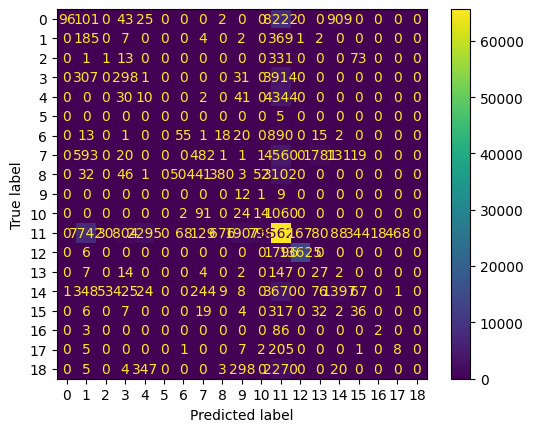

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [7.64339000e-06 6.56522984e-02 5.93658582e-04 1.04216570e-02
 1.98301952e-02 0.00000000e+00 4.13030205e-03 4.03344366e-03
 5.21059169e-03 1.67465480e-02 6.14216155e-03 5.98345510e-01
 1.34612149e-03 1.41829790e-02 8.61792139e-03 3.60496971e-03
 1.28443902e-04 3.34997607e-03 0.00000000e+00]
TPR: [0.01021494 0.3245614  0.00238663 0.06548011 0.00225887 0.
 0.05418719 0.06351298 0.0913242  0.54545455 0.01175483 0.80780167
 0.88319181 0.13300493 0.22093943 0.08510638 0.02197802 0.0349345
 0.        ]
FNR: [0.98978506 0.6754386  0.99761337 0.93451989 0.99774113 1.
 0.94581281 0.93648702 0.9086758  0.45454545 0.98824517 0.19219833
 0.11680819 0.86699507 0.77906057 0.91489362 0.97802198 0.9650655
 1.        ]
TNR: [0.99999236 0.9343477  0.99940634 0.98957834 0.9801698  1.
 0.9958697  0.99596656 0.99478941 0.98325345 0.99385784 0.40165449
 0.99865388 0.98581702 0.99138208 0.99639503 0.99987156 0.99665002
 1.        ]
Accuracy: 0.5865577979034443
Precision(micro,macro,weight

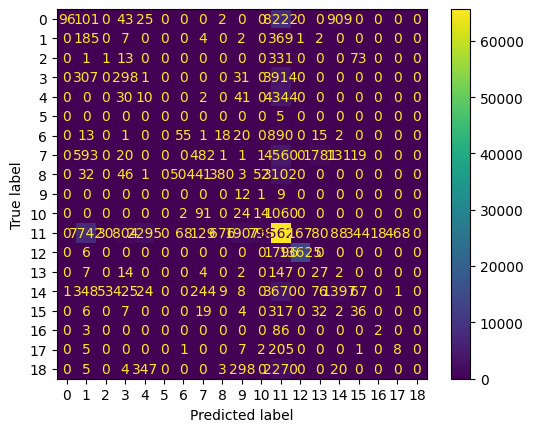

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [7.64339000e-06 6.56522984e-02 5.93658582e-04 1.04216570e-02
 1.98301952e-02 0.00000000e+00 4.13030205e-03 4.03344366e-03
 5.21059169e-03 1.67465480e-02 6.14216155e-03 5.98345510e-01
 1.34612149e-03 1.41829790e-02 8.61792139e-03 3.60496971e-03
 1.28443902e-04 3.34997607e-03 0.00000000e+00]
TPR: [0.01021494 0.3245614  0.00238663 0.06548011 0.00225887 0.
 0.05418719 0.06351298 0.0913242  0.54545455 0.01175483 0.80780167
 0.88319181 0.13300493 0.22093943 0.08510638 0.02197802 0.0349345
 0.        ]
FNR: [0.98978506 0.6754386  0.99761337 0.93451989 0.99774113 1.
 0.94581281 0.93648702 0.9086758  0.45454545 0.98824517 0.19219833
 0.11680819 0.86699507 0.77906057 0.91489362 0.97802198 0.9650655
 1.        ]
TNR: [0.99999236 0.9343477  0.99940634 0.98957834 0.9801698  1.
 0.9958697  0.99596656 0.99478941 0.98325345 0.99385784 0.40165449
 0.99865388 0.98581702 0.99138208 0.99639503 0.99987156 0.99665002
 1.        ]
Accuracy: 0.5865577979034443
Precision(micro,macro,weight

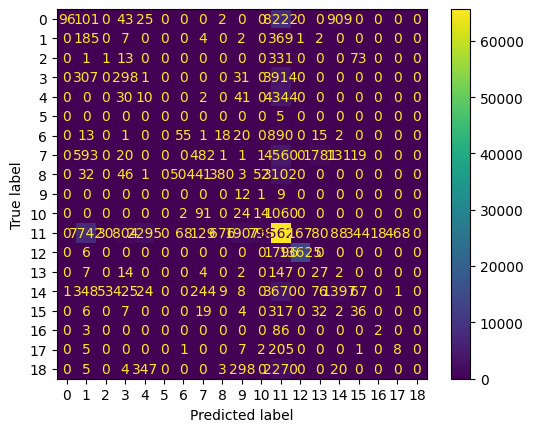

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_DF_eps_0.0001.npy'

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "XGB", "DF", epsilon)